#  Kaggle - Hotel Bookings Demand (IML Seminar 20/21)

## Feature Exploration 

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

# # THIS IS NEEDED FOR GOOGLE COLAB
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv("drive/My Drive/Current_Research_DS_IML/dataset/Hotel_Bookings.csv")

# THIS IS NEEDED FOR JUPYTER
df = pd.read_csv("Datasets/Hotel_Bookings.csv")

df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [58]:
df.shape

(119390, 32)

### Attribute Decision and Handling Missing Values

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [52]:
################################
# ADAPT TO CORRECT DATATYPES
################################

df["hotel"] = df["hotel"].astype(dtype="category")
df["is_canceled"] = df["is_canceled"].astype(dtype="category")
df["arrival_date_month"] = df["arrival_date_month"].astype(dtype="category")
df["meal"] = df["meal"].astype(dtype="category")
df["country"] = df["country"].astype(dtype="category")
df["market_segment"] = df["market_segment"].astype(dtype="category")
df["distribution_channel"] = df["distribution_channel"].astype(dtype="category")
df["is_repeated_guest"] = df["is_repeated_guest"].astype(dtype="category")
df["reserved_room_type"] = df["reserved_room_type"].astype(dtype="category")
df["assigned_room_type"] = df["assigned_room_type"].astype(dtype="category")
df["deposit_type"] = df["deposit_type"].astype(dtype="category")
df["agent"] = df["agent"].astype(dtype="category")
df["company"] = df["company"].astype(dtype="category")
df["customer_type"] = df["customer_type"].astype(dtype="category")
df["reservation_status"] = df["reservation_status"].astype(dtype="category")
df["reservation_status_date"] = df["reservation_status_date"].astype(dtype="category")

# df["children"] = df["children"].astype(dtype="int64")
# check children, this transformation did not work, why ?

df.dtypes

hotel                             category
is_canceled                       category
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                           float64
babies                               int64
meal                              category
country                           category
market_segment                    category
distribution_channel              category
is_repeated_guest                 category
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                category
assigned_room_type                category
booking_changes                      int64
deposit_type                      category
agent      

In [87]:
# Identify and Handle Missing Values
df.isnull().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [88]:
# Ratio of missing values of Country, Company and Agent
print("country: ", 1-(df["country"].count()/df.shape[0]))
print("company: ", 1-(df["company"].count()/df.shape[0]))
print("agent: ", 1-(df["agent"].count()/df.shape[0]))

country:  0.004087444509590421
company:  0.943068933746545
agent:  0.13686238378423654


#### Drop definitely company. Decide on Agent. Finally apply complete case.

In [53]:
df = df.drop(["company"],axis=1)

In [54]:
# Select and view categorical columns
df_obj_cols = df.select_dtypes(include="category")
obj_cols = df_obj_cols.columns
obj_cols

Index(['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
# Summarize categorical columns
for c in obj_cols:
    print(c)
    temp = df[c].value_counts()
    print(temp)
    print("---------------------------------------")

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
---------------------------------------
is_canceled
0    75166
1    44224
Name: is_canceled, dtype: int64
---------------------------------------
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
---------------------------------------
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
---------------------------------------
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NAM        1
NCL        1
DMA        1
NIC        1
BHS        1
Name: country, Length: 177, dtype: int64
---------------------------------------
market_segment
Online TA        56477
Offline TA/TO    

In [9]:
# Summarize normalized categorical columns
for c in obj_cols:
    print(c)
    temp = df[c].value_counts(normalize=True).round(3)
    print(temp)
    print("---------------------------------------")

hotel
City Hotel      0.664
Resort Hotel    0.336
Name: hotel, dtype: float64
---------------------------------------
is_canceled
0    0.63
1    0.37
Name: is_canceled, dtype: float64
---------------------------------------
arrival_date_month
August       0.116
July         0.106
May          0.099
October      0.093
April        0.093
June         0.092
September    0.088
March        0.082
February     0.068
November     0.057
December     0.057
January      0.050
Name: arrival_date_month, dtype: float64
---------------------------------------
meal
BB           0.773
HB           0.121
SC           0.089
Undefined    0.010
FB           0.007
Name: meal, dtype: float64
---------------------------------------
country
PRT    0.409
GBR    0.102
FRA    0.088
ESP    0.072
DEU    0.061
       ...  
NAM    0.000
NCL    0.000
DMA    0.000
NIC    0.000
BHS    0.000
Name: country, Length: 177, dtype: float64
---------------------------------------
market_segment
Online TA        0.473
Offline T

In [8]:
# Look at the distribution of Country
country_class_counts = df["country"].value_counts()
print("Number of unqiue values: ", df["country"].nunique())
print("Summary of the category frequencies: ",country_class_counts.describe())
print("TOP 20: ",(country_class_counts.sort_values(ascending=False)).head(20))

Number of unqiue values:  177
Summary of the category frequencies:  count      177.000000
mean       671.762712
std       3931.154035
min          1.000000
25%          2.000000
50%         12.000000
75%         74.000000
max      48590.000000
Name: country, dtype: float64
TOP 20:  PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
Name: country, dtype: int64


In [39]:
0.85*177

150.45

In [18]:
country_class_counts.quantile(0.85)

254.59999999999994

In [20]:
print(sum(country_class_counts[country_class_counts<=255])/sum(country_class_counts))
print(sum(country_class_counts[country_class_counts<=255]))
#-> 85% of the countries make only 3.5% of the visitors
#-> they should be grouped, so we don't have too many categories

0.035045667860927485
4167


In [37]:
country_cumsum_probs = (country_class_counts.sort_values(ascending=True)/sum(country_class_counts)).cumsum()
print(country_cumsum_probs)

BHS    0.000008
BFA    0.000017
ASM    0.000025
SMR    0.000034
ATF    0.000042
         ...   
DEU    0.329683
ESP    0.401743
FRA    0.489336
GBR    0.591344
PRT    1.000000
Name: country, Length: 177, dtype: float64


In [51]:
print(sum(country_cumsum_probs<=0.01))
print(sum(country_cumsum_probs<=0.02))
print(sum(country_cumsum_probs<=0.03))
print(sum(country_cumsum_probs<=0.04))
print(sum(country_cumsum_probs<=0.05))
print(sum(country_cumsum_probs<=0.06))
# -> choose 3% range, as after it the change increase is not that high anymore

121
138
147
152
155
157


In [86]:
temp = country_class_counts.sort_values(ascending=True)
temp.iloc[146]

197

In [91]:
print(sum(country_class_counts[country_class_counts<=197])/sum(country_class_counts))
print(sum(country_class_counts[country_class_counts<=197]))
print("Amount of grouped categories:",sum(country_class_counts<=197))

0.029225748936098635
3475
Amount of grouped categories: 147


In [13]:
# look at distribution of Agent attribute
agent_counts = df["agent"].value_counts()
print("Summary of category counts:", agent_counts.describe())
print("TOP 10: ",agent_counts.sort_values(ascending=False).head(10))

Summary of category counts: count      333.000000
mean       309.459459
std       1981.357377
min          1.000000
25%          3.000000
50%         24.000000
75%        100.000000
max      31961.000000
Name: agent, dtype: float64
TOP 10:  9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
6.0       3290
250.0     2870
241.0     1721
28.0      1666
8.0       1514
Name: agent, dtype: int64


In [14]:
# Summarize non-categorical columns
num_cols = df.select_dtypes(exclude="category")
for c in num_cols:
    print(c)
    print(df[c].describe())
    print("Skew: ", sp.stats.skew(df[c]), "Kurtosis: ", sp.stats.kurtosis(df[c])-3)
    print("-----------------------------")

lead_time
count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64
Skew:  1.3465329547937892 Kurtosis:  -1.3036724521745393
-----------------------------
arrival_date_year
count    119390.000000
mean       2016.156554
std           0.707476
min        2015.000000
25%        2016.000000
50%        2016.000000
75%        2017.000000
max        2017.000000
Name: arrival_date_year, dtype: float64
Skew:  -0.23258032965769215 Kurtosis:  -3.9945723562850697
-----------------------------
arrival_date_week_number
count    119390.000000
mean         27.165173
std          13.605138
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64
Skew:  -0.010014200222448031 Kurtosis:  -3.9860861353853956
-----------------------------
arrival_da

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys
/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys
/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys
/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys
/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning:

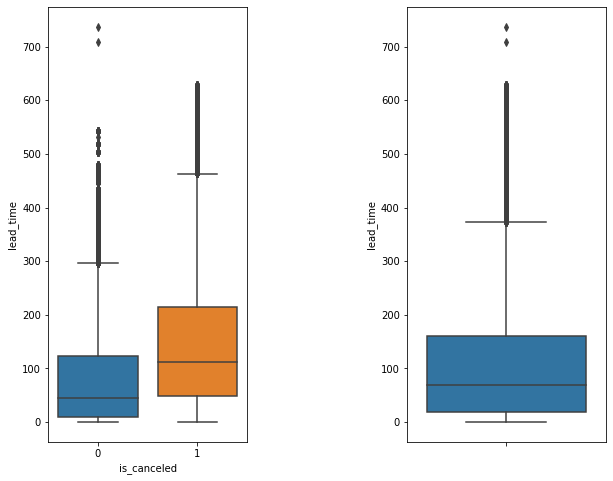

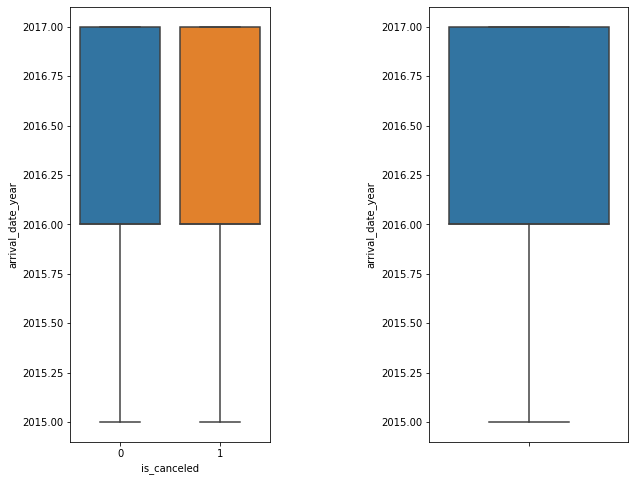

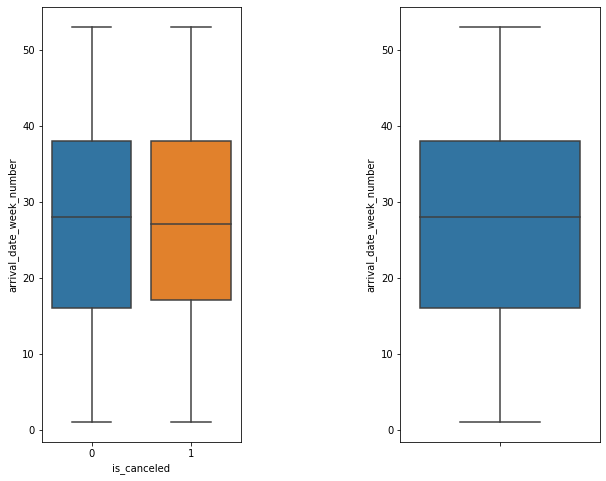

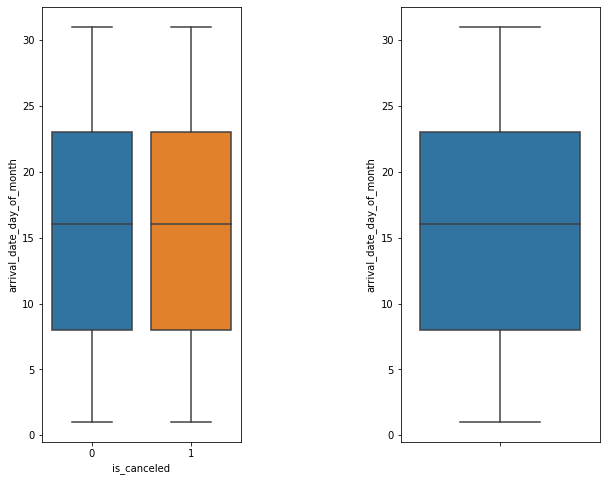

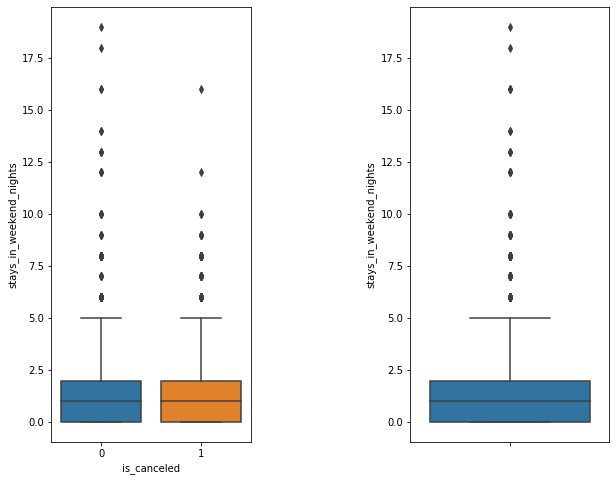

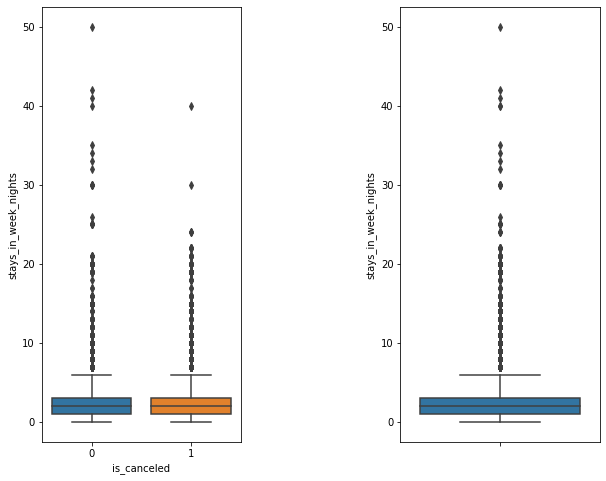

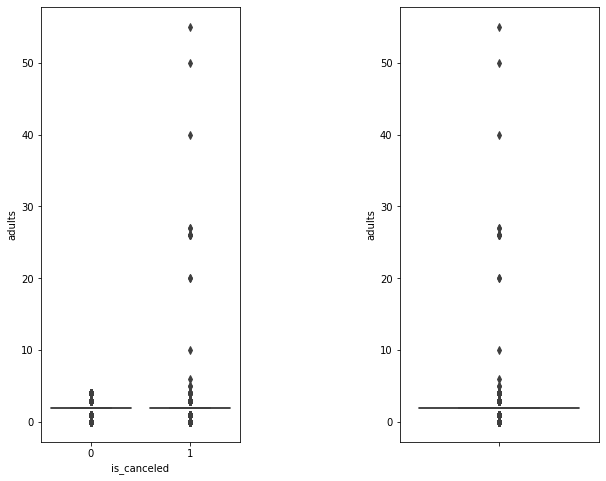

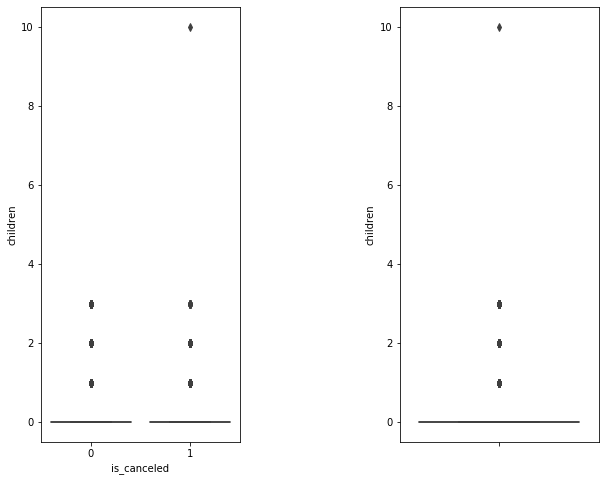

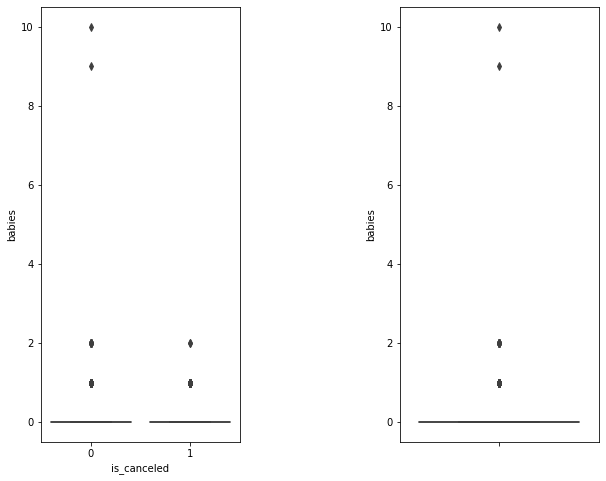

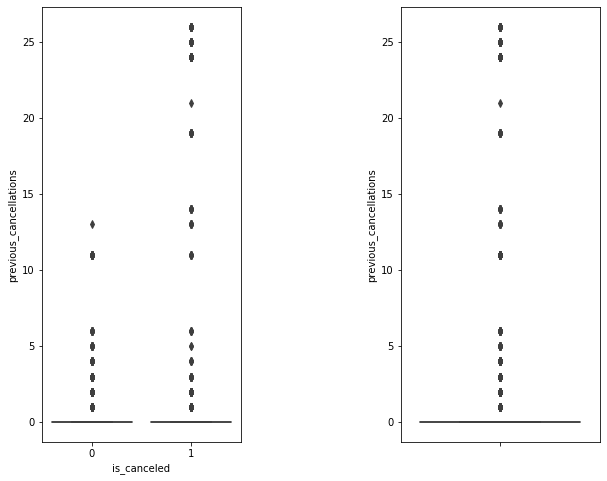

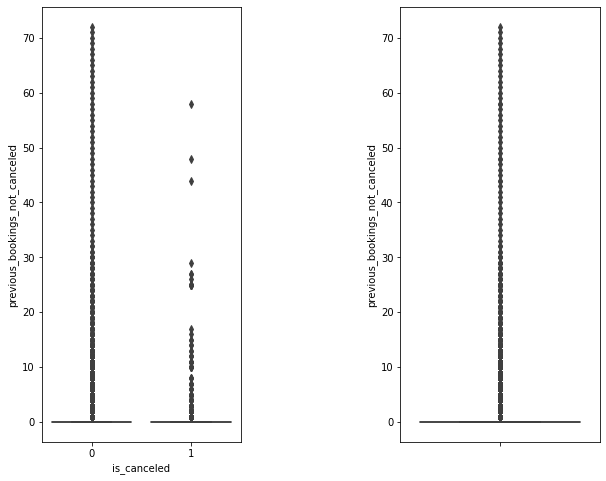

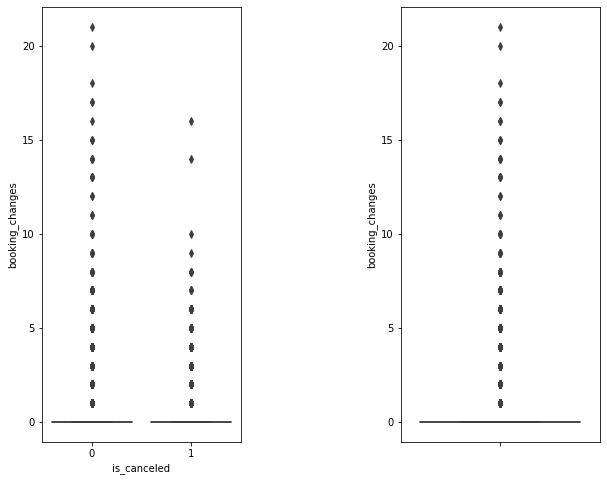

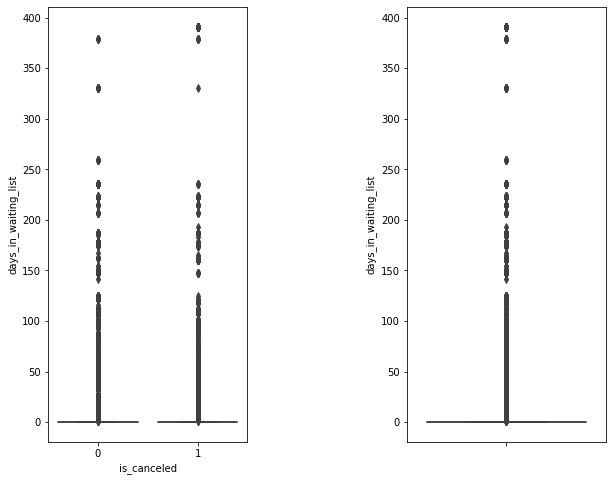

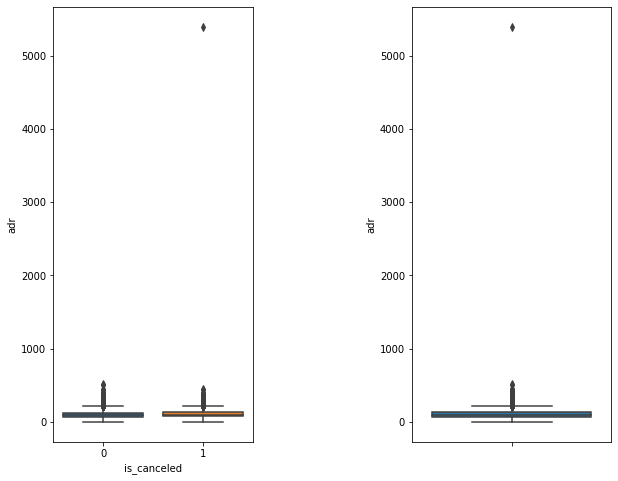

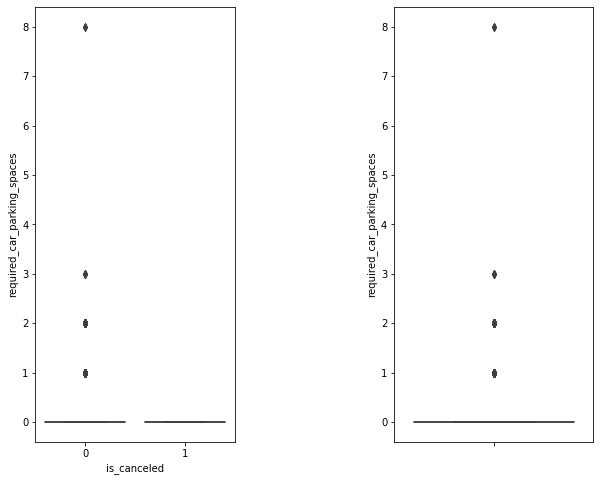

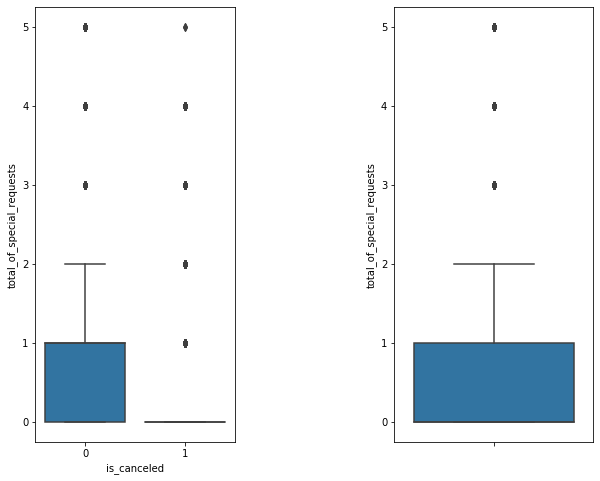

In [15]:
# Plot a few boxplots in order to visualize their distribution and outliers
for c in num_cols.columns:
    fig,ax = plt.subplots(1,2,figsize=(10,8))
    plt.subplots_adjust(wspace=0.8)
    sns.boxplot(y=c,x="is_canceled",data=df,orient="v",ax=ax[0])
    sns.boxplot(y=c,data=df,orient="v",ax=ax[1])
    fig.show()

In [95]:
# Going through all non-categorical variables separately, and have a look on the distribution of extremes

nr = df.shape[0]
print("LT, >650 :", sum(df["lead_time"]>650), sum(df["lead_time"]>650)/nr)
print("SiWEN, >5 :", sum(df["stays_in_weekend_nights"]>5), sum(df["stays_in_weekend_nights"]>5)/nr)
print("SiWN, >8:", sum(df["stays_in_week_nights"]>8), sum(df["stays_in_week_nights"]>8)/nr)
print("SiWEN =0 & SiWN =0 :", sum((df["stays_in_week_nights"]==0) & (df["stays_in_weekend_nights"]==0)))
print("Adults, >5:", sum(df["adults"]>5), sum(df["adults"]>5)/nr)
print("Adults, =0:", sum(df["adults"]==0), sum(df["adults"]==0)/nr)
print("Children, >0:", sum(df["children"]>0), sum(df["children"]>0)/nr)
print("Babies, >0:", sum(df["babies"]>0), sum(df["babies"]>0)/nr)
print("No Guests:", sum((df["adults"]==0) & (df["children"]==0) & (df["babies"]==0)))
print("PrevCanc, >0:", sum(df["previous_cancellations"]>0), sum(df["previous_cancellations"]>0)/nr)
print("Booking_changes, >0:", sum(df["booking_changes"]>0), sum(df["booking_changes"]>0)/nr)
print("ADR, >5000:", sum(df["adr"]>5000))
print("ADR, <0:", sum(df["adr"]<0))
print("ADR, =0:", sum(df["adr"]==0))
print("require_car_parking_spaces, >0:",sum(df["required_car_parking_spaces"]>0))
print("total_of_special_requests, >2:", sum(df["total_of_special_requests"]>2))

LT, >650 : 2 1.6751821760616466e-05
SiWEN, >5 : 265 0.0022196163832816818
SiWN, >8: 1669 0.013979395259234442
SiWEN =0 & SiWN =0 : 715
Adults, >5: 14 0.00011726275232431528
Adults, =0: 403 0.003375492084764218
Children, >0: 8590 0.07194907446184773
Babies, >0: 917 0.00768071027724265
No Guests: 180
PrevCanc, >0: 6484 0.054309406147918585
Booking_changes, >0: 18076 0.15140296507245163
ADR, >5000: 1
ADR, <0: 1
ADR, =0: 1959
require_car_parking_spaces, >0: 7416
total_of_special_requests, >2: 2877


In [17]:
#############################################
# THERE ARE RECORDS WITH NO GUESTS AND RECORDS WITH NO STAYS
#############################################

In [18]:
print("Mean:",df["babies"].mean())
print("Max value:", df["babies"].max())
print(df["babies"].value_counts())

Mean: 0.007948739425412514
Max value: 10
0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64


### Better understanding of features with extreme values

In [20]:
# View the records which have very extremes values in some columns
pd.set_option("display.max_columns", 32)
df[(df["babies"]>2) | (df["children"]==10) | (df["adr"]>1000) | (df["lead_time"]>650)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8.0,NaN,0,Contract,133.16,0,1,No-Show,2015-07-12
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,0.0,0,HB,GBR,Direct,Direct,0,0,0,E,E,2,No Deposit,NaN,NaN,0,Transient,68.00,0,0,Check-Out,2016-03-24
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,NaN,0,Transient,84.45,0,1,Check-Out,2016-01-14
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.00,0,0,Canceled,2016-02-19
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0.0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,NaN,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14


In [97]:
# View the records which have very extremes values in some columns
pd.set_option("display.max_columns", 32)
df[df["adr"]==0].head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-05
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,0,Transient,0.0,0,0,Check-Out,2015-07-06
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07
197,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,E,0,No Deposit,240.0,0,Transient,0.0,0,1,Check-Out,2015-07-07
421,Resort Hotel,1,57,2015,July,29,15,0,2,2,0.0,0,FB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,305.0,0,Transient-Party,0.0,0,0,Canceled,2015-07-13
428,Resort Hotel,0,57,2015,July,29,15,0,2,1,0.0,0,FB,PRT,Groups,Direct,0,0,0,A,A,1,No Deposit,305.0,0,Transient-Party,0.0,0,0,Check-Out,2015-07-17
459,Resort Hotel,0,6,2015,July,29,17,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,0.0,0,1,Check-Out,2015-07-17


In [21]:
# Ghost bookings
df[(df["adults"]==0) & (df["babies"]==0) & (df["children"]==0)].head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,NaN,174.0,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,NaN,174.0,0,Transient,0.0,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.0,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,NaN,122,Transient-Party,0.0,0,0,Check-Out,2016-01-05
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
9376,Resort Hotel,1,0,2016,November,48,21,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,386.0,0,Group,0.0,0,0,Canceled,2016-11-21
31765,Resort Hotel,0,31,2016,December,53,27,2,8,0,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,3,No Deposit,NaN,NaN,0,Transient,28.0,1,0,Check-Out,2017-01-06
32029,Resort Hotel,0,4,2017,January,2,14,0,1,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,G,0,No Deposit,168.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-01-15
32827,Resort Hotel,0,46,2017,January,4,25,3,9,0,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,I,8,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-02-06


In [22]:
# Maybe these were only booked for hours, who knows the reason behind :) 
# here also the 737 outlier regarding lead_time occurs

df[(df["stays_in_week_nights"]==0) & (df["stays_in_weekend_nights"]==0)].head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07
197,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,E,0,No Deposit,240.0,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07
459,Resort Hotel,0,6,2015,July,29,17,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-17
568,Resort Hotel,0,0,2015,July,30,20,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,I,0,No Deposit,5.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-20
569,Resort Hotel,0,0,2015,July,30,20,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,I,0,No Deposit,241.0,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-20
618,Resort Hotel,0,16,2015,July,30,23,0,0,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,C,I,0,No Deposit,242.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-23


#### Check if the extreme cases are connected some how.

In [102]:
sum((df["adr"]==0))

1959

In [125]:
sum((df["stays_in_week_nights"]==0) & 
    (df["stays_in_weekend_nights"]==0))

715

In [101]:
# as can be seen all total stays=0 also show ADR=0, because in total there are only 715 total stays =0 instances
sum((df["adr"]==0) & (df["stays_in_week_nights"]==0) & (df["stays_in_weekend_nights"]==0))

715

In [123]:
# also most of the total guests=0 are showing ADR=0
sum((df["adr"]==0) & (df["adults"]==0) & (df["babies"]==0) & (df["children"]==0))

149

In [127]:
sum((df["adr"]==0) & 
    (df["stays_in_week_nights"]==0) & 
    (df["stays_in_weekend_nights"]==0) & 
    (df["adults"]==0) & (df["babies"]==0) & (df["children"]==0))

70

In [128]:
sum((df["stays_in_week_nights"]==0) & 
    (df["stays_in_weekend_nights"]==0) & 
    (df["adults"]==0) & (df["babies"]==0) & (df["children"]==0))

70

In [166]:
df.loc[df["adr"]==0,["required_car_parking_spaces","lead_time","children","babies","adults","stays_in_weekend_nights","stays_in_week_nights"]].describe()


,required_car_parking_spaces,lead_time,children,babies,adults,stays_in_weekend_nights,stays_in_week_nights
count,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000
mean,0.075928,45.225194,0.069888,0.017256,1.750647,0.528904,1.736842
std,0.264996,89.153349,0.328995,0.130281,3.226742,0.998609,2.057200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,39.000000,0.000000,0.000000,2.000000,1.000000,2.000000
max,1.000000,542.000000,3.000000,1.000000,55.000000,14.000000,34.000000


In [167]:
# we can see, that the extremes of adults are only lying in ADR=0, and also require_car_parking_spaces
df.loc[df["adr"]>0,["required_car_parking_spaces","lead_time","children","babies","adults","stays_in_weekend_nights","stays_in_week_nights"]].describe()


,required_car_parking_spaces,lead_time,children,babies,adults,stays_in_weekend_nights,stays_in_week_nights
count,116714.000000,116714.000000,116714.000000,116714.000000,116714.000000,116714.000000,116714.000000
mean,0.061843,105.457349,0.104786,0.007874,1.862664,0.937454,2.522611
std,0.244158,106.999180,0.400218,0.097159,0.480151,0.992390,1.882146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,1.000000
50%,0.000000,71.000000,0.000000,0.000000,2.000000,1.000000,2.000000
75%,0.000000,162.000000,0.000000,0.000000,2.000000,2.000000,3.000000
max,8.000000,709.000000,10.000000,10.000000,4.000000,16.000000,40.000000


In [23]:
# Check if the nights are in conflict, e.g. 2 weekend_nights but 11 week_nights
print(sum(df["stays_in_week_nights"]>(np.ceil(df["stays_in_weekend_nights"]/2)*5+5)))
print(sum(df["stays_in_week_nights"]<((np.floor(df["stays_in_weekend_nights"]/2)-1)*5)))

0
0


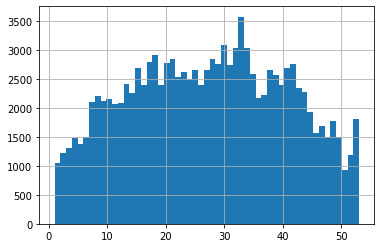

In [24]:
df["arrival_date_week_number"].hist(bins=max(df["arrival_date_week_number"]))

In [25]:
# Try to find something out about market_segment, agent, customer_type and distribution_channel 
pd.crosstab(df["market_segment"],df["customer_type"])

customer_type,Contract,Group,Transient,Transient-Party
market_segment,,,,
Aviation,0,2,218,17
Complementary,2,6,703,32
Corporate,22,29,3576,1668
Direct,14,134,11336,1122
Groups,735,16,8427,10633
Offline TA/TO,1817,211,14054,8137
Online TA,1486,179,51299,3513
Undefined,0,0,0,2


In [26]:
pd.crosstab(df["market_segment"],df["distribution_channel"])

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
market_segment,,,,,
Aviation,227,0,0,10,0
Complementary,89,576,0,78,0
Corporate,4788,172,0,335,0
Direct,90,12276,1,237,2
Groups,1228,1472,0,17111,0
Offline TA/TO,212,16,45,23946,0
Online TA,43,133,147,56153,1
Undefined,0,0,0,0,2


In [27]:
pd.crosstab(df["customer_type"],df["distribution_channel"])

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
customer_type,,,,,
Contract,27,19,0,4030,0
Group,31,116,0,430,0
Transient,4157,12343,193,72919,1
Transient-Party,2462,2167,0,20491,4


In [28]:
agent_isNotNull = 1-df["agent"].isnull()
aggF = lambda x:sum(x)/len(x)
# Number of non missing values for agent variable relative to the total number of records of the respective cell
# The missingness seems to depend on the cells
pd.crosstab(df["customer_type"],df["market_segment"],values=agent_isNotNull,aggfunc=aggF)

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
customer_type,,,,,,,,
Contract,NaN,0.500000,0.772727,0.928571,1.000000,0.999450,0.996635,NaN
Group,1.000000,0.500000,0.137931,0.604478,0.500000,0.985782,0.960894,NaN
Transient,0.087156,0.123755,0.090045,0.529817,0.792927,0.980646,0.993899,NaN
Transient-Party,0.235294,0.375000,0.214628,0.444742,0.774758,0.986113,0.993453,0.0


In [29]:
# Absolute numbers of the observations per cell, to have a feeling on above estimation variability
pd.crosstab(df["customer_type"],df["market_segment"])

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
customer_type,,,,,,,,
Contract,0,2,22,14,735,1817,1486,0
Group,2,6,29,134,16,211,179,0
Transient,218,703,3576,11336,8427,14054,51299,0
Transient-Party,17,32,1668,1122,10633,8137,3513,2


In [30]:
pd.crosstab(df["customer_type"],agent_isNotNull,normalize="index")

agent,0,1
customer_type,,
Contract,0.003189,0.996811
Group,0.171577,0.828423
Transient,0.130885,0.869115
Transient-Party,0.179072,0.820928


In [31]:
pd.crosstab(df["market_segment"],agent_isNotNull,normalize="index")

agent,0,1
market_segment,,
Aviation,0.894515,0.105485
Complementary,0.861373,0.138627
Corporate,0.867611,0.132389
Direct,0.476519,0.523481
Groups,0.209379,0.790621
Offline TA/TO,0.016062,0.983938
Online TA,0.006162,0.993838
Undefined,1.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd98846eef0>]],
      dtype=object)

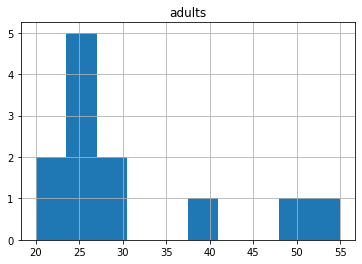

In [32]:
# Plotting a histogram for Adults variable's extremes in order to see its distribution
ad = df['adults']>10
df.loc[ad,['adults']].hist(bins=10)

In [33]:
# Calculation if is_canceled is correlated with previous_cancellations, on marginal basis (YES)
print(sum((df["is_canceled"]==1) & (df["previous_cancellations"]>0))/sum(df["previous_cancellations"]>0))
print(sum(df["is_canceled"]==1)/nr)

0.9164096236890809
0.37041628277075134


In [34]:
pd.crosstab(df["previous_cancellations"],df["is_canceled"],normalize="index")

is_canceled,0,1
previous_cancellations,,
0,0.660939,0.339061
1,0.055693,0.944307
2,0.672414,0.327586
3,0.692308,0.307692
4,0.774194,0.225806
5,0.894737,0.105263
6,0.681818,0.318182
11,0.714286,0.285714
13,0.083333,0.916667


### analyze feature correlation

In [ ]:
#### FIRST bring data in shape as we will use it later, i.e. drop NAs, drop ADR outliers, drop 0 guests

Skew: 10.530081681526998 Kurtosis:  1013.1473691618601
Skew: 1.0178174172225603 Kurtosis:  2.1317066250346564


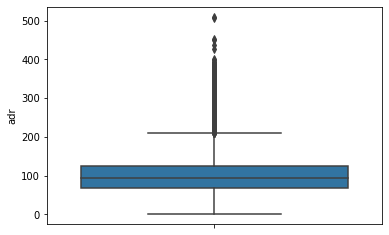

In [72]:
df_c = df.copy()
###########################
# DROP ADR<0 AND ADR>5000
###########################
print("Skew:",sp.stats.skew(df_c["adr"]),"Kurtosis: ",sp.stats.kurtosis(df_c["adr"]))
df_c = df_c[(df_c["adr"]<5000) & (df_c["adr"]>=0)]
sns.boxplot(y="adr",data=df_c,orient="v")
print("Skew:",sp.stats.skew(df_c["adr"]),"Kurtosis: ",sp.stats.kurtosis(df_c["adr"]))


In [73]:
df_c.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [74]:
df_c = df_c[ ( df_c["adults"] + df_c["children"] + df_c["babies"] )>0 ]

In [75]:
# was not possible before, due to NAN
df_c["children"] = df_c["children"].astype(dtype="int64")

In [76]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119204 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119204 non-null  category
 1   is_canceled                     119204 non-null  category
 2   lead_time                       119204 non-null  int64   
 3   arrival_date_year               119204 non-null  int64   
 4   arrival_date_month              119204 non-null  category
 5   arrival_date_week_number        119204 non-null  int64   
 6   arrival_date_day_of_month       119204 non-null  int64   
 7   stays_in_weekend_nights         119204 non-null  int64   
 8   stays_in_week_nights            119204 non-null  int64   
 9   adults                          119204 non-null  int64   
 10  children                        119204 non-null  int64   
 11  babies                          119204 non-null  int64   
 12  me

In [77]:
#################################
# only considering country because I want to use agent also to calculate the cramer V value
# furthermore dropping agents NA is not as we will use it, because we actually drop the whole column
#################################
df_c = df_c.dropna(subset=["country"])

In [78]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118726 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           118726 non-null  category
 1   is_canceled                     118726 non-null  category
 2   lead_time                       118726 non-null  int64   
 3   arrival_date_year               118726 non-null  int64   
 4   arrival_date_month              118726 non-null  category
 5   arrival_date_week_number        118726 non-null  int64   
 6   arrival_date_day_of_month       118726 non-null  int64   
 7   stays_in_weekend_nights         118726 non-null  int64   
 8   stays_in_week_nights            118726 non-null  int64   
 9   adults                          118726 non-null  int64   
 10  children                        118726 non-null  int64   
 11  babies                          118726 non-null  int64   
 12  me

In [79]:
#################
# GROUP COUNTRY
#################

country_class_counts = df_c["country"].value_counts()
others_list = country_class_counts[country_class_counts<=197].index

categories = country_class_counts.index.tolist()
categories.append('OTHER')

# so we can change values easily
df_c["country"] = df_c["country"].astype(dtype="object")

for i in range(0,len(others_list)):
    df_c.loc[df['country'] == others_list[i], 'country'] = 'OTHER'
    
df_c["country"] = df_c["country"].astype(dtype="category")

In [80]:
print(df_c["country"].value_counts())
print(df_c["country"].unique())

PRT      48478
GBR      12119
FRA      10401
ESP       8560
DEU       7285
ITA       3761
OTHER     3471
IRL       3374
BEL       2342
BRA       2222
NLD       2103
USA       2093
CHE       1726
CN        1279
AUT       1263
SWE       1020
CHN        999
POL        918
ISR        669
RUS        630
NOR        607
ROU        500
FIN        446
DNK        435
AUS        426
AGO        362
LUX        286
MAR        259
TUR        248
HUN        230
ARG        214
Name: country, dtype: int64
[PRT, GBR, USA, ESP, IRL, ..., AUT, TUR, AGO, ISR, HUN]
Length: 31
Categories (31, object): [PRT, GBR, USA, ESP, ..., TUR, AGO, ISR, HUN]


In [81]:
#####################
# ANALYZE ALSO SOME FURTHER FEATURES
#####################
df_c["total_guests"] = df_c["adults"] + df_c["children"]+ df_c["babies"]
df_c["total_nights"] = df_c["stays_in_week_nights"] + df_c["stays_in_weekend_nights"]
df_c["previous_cancellation_ratio"] = df_c["previous_cancellations"]/(df_c["previous_bookings_not_canceled"]+df_c["previous_cancellations"]+1e-5)

# PEARSON CORRELATION FOR NUMERIC DATA
df_c["is_canceled"] = df_c["is_canceled"].astype(dtype="int64")
df_c_num = df_c.select_dtypes(exclude="category")

# absolute value of correlation
# we could also check other correlations, spearman, kendall but the order does not very change
np.abs(df_c_num.corrwith(df_c_num["is_canceled"])).sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.291619
previous_cancellation_ratio       0.291484
total_of_special_requests         0.235923
required_car_parking_spaces       0.195013
booking_changes                   0.145139
previous_cancellations            0.109911
adults                            0.056129
previous_bookings_not_canceled    0.055494
days_in_waiting_list              0.054114
adr                               0.045910
total_guests                      0.042992
babies                            0.032605
stays_in_week_nights              0.024825
total_nights                      0.017688
arrival_date_year                 0.016419
arrival_date_week_number          0.007668
arrival_date_day_of_month         0.006022
children                          0.004536
stays_in_weekend_nights           0.002192
dtype: float64

In [82]:
################################
# IS THERE A DIFFERENCE IF WE EXCLUDE SOME MORE EXTREME VALUES
################################
df_cc = df_c.copy()

df_cc["adults"] = df_cc.loc[df_cc["adults"]<20,["adults"]]
df_cc["children"] = df_cc.loc[df_cc["children"]<8,["children"]]
df_cc["babies"] = df_cc.loc[df_cc["babies"]<8,["babies"]]
df_cc["required_car_parking_spaces"] = df_cc.loc[df_cc["required_car_parking_spaces"]<8,["required_car_parking_spaces"]]

df_cc["total_guests"] = df_cc["adults"] + df_cc["children"]+ df_cc["babies"]
df_cc["total_nights"] = df_cc["stays_in_week_nights"] + df_cc["stays_in_weekend_nights"]

# PEARSON CORRELATION FOR NUMERIC DATA
df_cc_num = df_cc.select_dtypes(exclude="category")

# absolute value of correlation
# we could also check other correlations, spearman, kendall but the order does not very change
np.abs(df_cc_num.corrwith(df_cc_num["is_canceled"])).sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.291619
previous_cancellation_ratio       0.291484
total_of_special_requests         0.235923
required_car_parking_spaces       0.196348
booking_changes                   0.145139
previous_cancellations            0.109911
adults                            0.058843
previous_bookings_not_canceled    0.055494
days_in_waiting_list              0.054114
adr                               0.045910
total_guests                      0.041925
babies                            0.034204
stays_in_week_nights              0.024825
total_nights                      0.017688
arrival_date_year                 0.016419
arrival_date_week_number          0.007668
arrival_date_day_of_month         0.006022
children                          0.004276
stays_in_weekend_nights           0.002192
dtype: float64

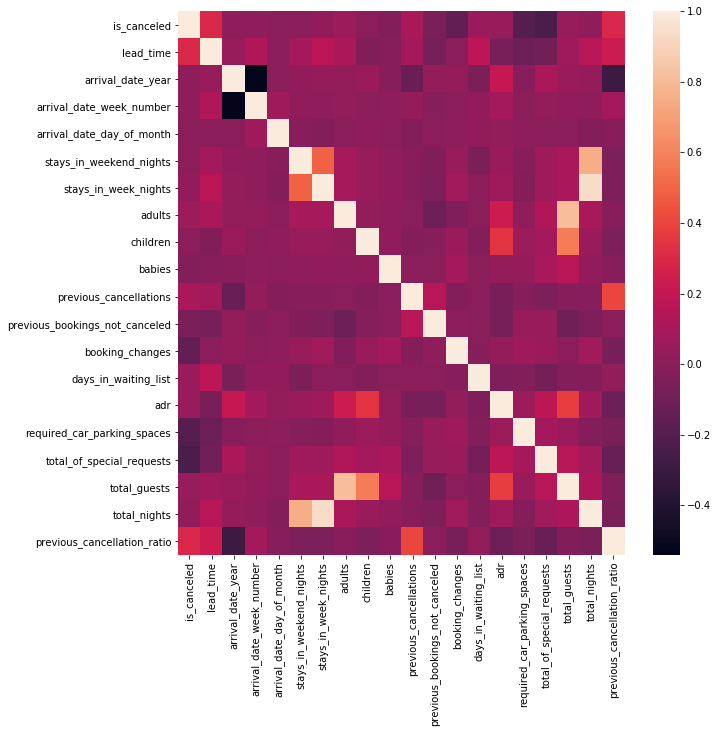

In [83]:
###########
# HEATMAP WRT DF_C
###########
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_c_num.corr()) # try also spearman, kendall

In [84]:
def cramers_corrected_stat(x,y):

    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)
        #print((conf_matrix>5).all(axis=None))
        
        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True
        
        chi2 = sp.stats.chi2_contingency(conf_matrix,correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

In [85]:
import sklearn.metrics as sklMet

###############
# CALCULATE CRAMERV BETWEEN IS_CANCELED AND THE OTHERS
###############

df_c["is_family"] = (df_c["adults"]>0) & ((df_c["children"]>0) | (df_c["babies"]>0))
df_c["is_family"] = df_c["is_family"].astype("category")

cramer_vs = {}
amis = {}
for c in df_c.columns:
    # not working for float variables
    if(c!="adr") & (c!="previous_cancellation_ratio"):
        # CRAMER V
        ct = pd.crosstab(df_c[c],df_c["is_canceled"])    
        cv = cramers_corrected_stat(df_c[c],df_c["is_canceled"].astype(dtype="category"))
        
        # ADJUSTED MUTUAL INFORMATION
        temp = pd.DataFrame({c:df_c[c], "is_canceled":df_c["is_canceled"]})
        temp = temp.dropna()
        mis = sklMet.adjusted_mutual_info_score(temp[c].astype(dtype="category"),temp["is_canceled"].astype(dtype="category"))    

        cramer_vs[c] = cv
        amis[c] = mis
        #print(c,"\n","Cramers V:",cv, "MI: ", round(mis,6))
    
    
cramer_vs = pd.Series(cramer_vs)
amis = pd.Series(amis)

# cramer V <0.3 is smal effect, cramer V <0.5 is medium, cramer V >0.5 is strong
print("Cramer V:\n",cramer_vs.sort_values(ascending=False))
# AMIS is 1 if variables are perfectly associated, around 0 if not ( can become negative)
print("\nAdjusted Mutual Info Score:\n", amis.sort_values(ascending=False))

Cramer V:
 is_canceled                       1.000000
reservation_status                0.999996
reservation_status_date           0.481369
deposit_type                      0.481316
agent                             0.392341
lead_time                         0.383653
country                           0.353158
previous_cancellations            0.278381
total_of_special_requests         0.266550
market_segment                    0.265616
assigned_room_type                0.200554
required_car_parking_spaces       0.196852
booking_changes                   0.187468
distribution_channel              0.174961
days_in_waiting_list              0.159902
total_nights                      0.149385
customer_type                     0.137865
hotel                             0.134485
stays_in_week_nights              0.117739
previous_bookings_not_canceled    0.110510
arrival_date_week_number          0.093410
total_guests                      0.090852
is_repeated_guest                 0.084065


In [86]:
############################
# Compute cramerV between all variables, BUT EXCLUDED all self created features
# also because I want to use this heatmap for the report
############################

cramer_vs = {}

colsCrV = df_c.columns.drop(["adr","previous_cancellation_ratio","is_family","total_guests","total_nights"])

for c1 in colsCrV:
    c1_vals = []
    for c2 in colsCrV:
        cv = cramers_corrected_stat(df_c[c1],df_c[c2])
        c1_vals.append(cv)
    cramer_vs[c1]=c1_vals

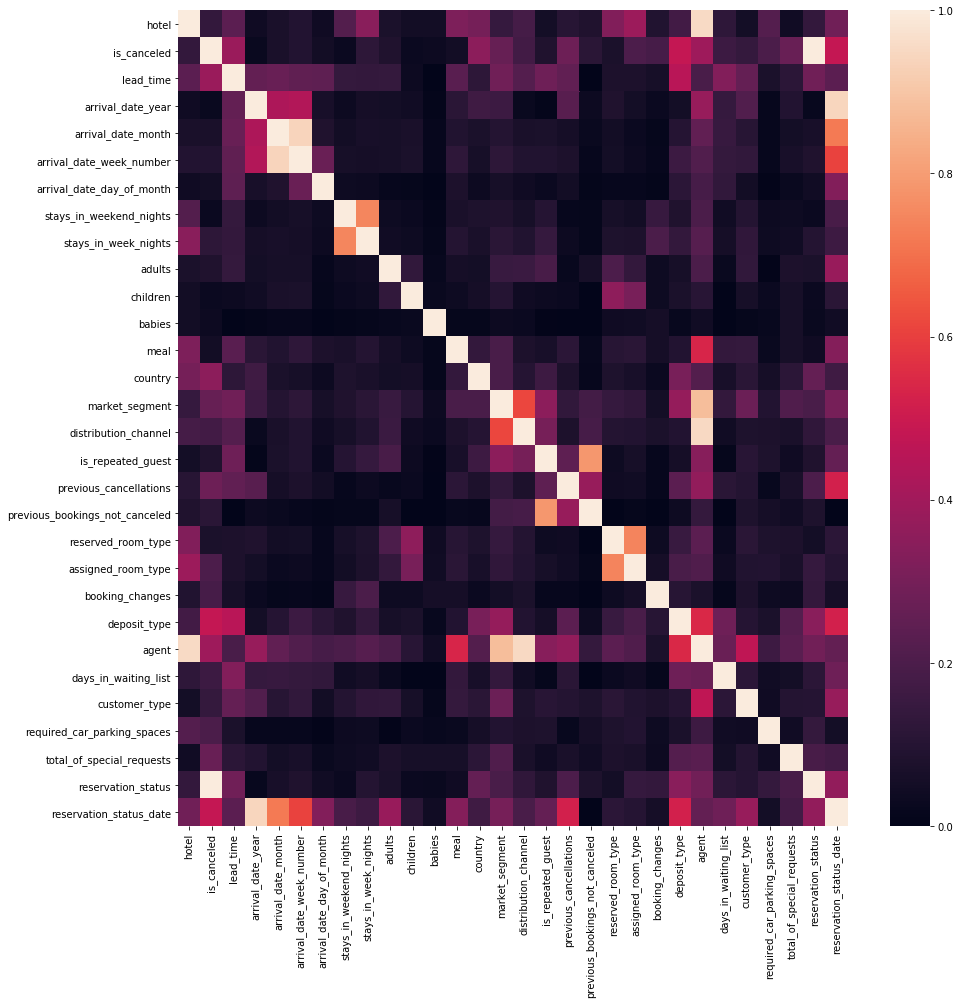

In [87]:
CramerV_matrix = pd.DataFrame(cramer_vs)
CramerV_matrix = CramerV_matrix.set_index(colsCrV)

# brighter values, starting at 0.5 are now strong associations
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(CramerV_matrix)

##  Preprocessing

Bring all preprocessings together. Also apply findings from the correlation analysis, that is which features can be dropped

In [3]:
# IS ALREADY DONE, BUT I INCLUDE HERE AGAIN, JUST TO GROUP ALL PREPROCESSING STEPS
import pandas as pd

df = pd.read_csv("datasets/dataset.csv")

df["hotel"] = df["hotel"].astype(dtype="category")
df["is_canceled"] = df["is_canceled"].astype(dtype="uint8")
df["arrival_date_month"] = df["arrival_date_month"].astype(dtype="category")
df["meal"] = df["meal"].astype(dtype="category")
df["country"] = df["country"].astype(dtype="category")
df["market_segment"] = df["market_segment"].astype(dtype="category")
df["distribution_channel"] = df["distribution_channel"].astype(dtype="category")
df["is_repeated_guest"] = df["is_repeated_guest"].astype(dtype="category")
df["reserved_room_type"] = df["reserved_room_type"].astype(dtype="category")
df["assigned_room_type"] = df["assigned_room_type"].astype(dtype="category")
df["deposit_type"] = df["deposit_type"].astype(dtype="category")
df["agent"] = df["agent"].astype(dtype="category")
df["company"] = df["company"].astype(dtype="category")
df["customer_type"] = df["customer_type"].astype(dtype="category")
df["reservation_status"] = df["reservation_status"].astype(dtype="category")
df["reservation_status_date"] = df["reservation_status_date"].astype(dtype="category")

In [4]:
# Based on previous analysis, delete reservation_status (leak of info),
# reservation_status_date, company (many NA), arrival_date_year (for more generalization), 
# is_repeated_guest(redundant, derived from prev bookings not canceled/canceled), 
# arrival_date_month (redundant with arrival_week_number) 
# and distribution_channel (redundant, highly correlated to market_segment)
# and agent (missing values and lack of interpretability)

df = df.drop(['reservation_status','reservation_status_date','is_repeated_guest','company',
              'arrival_date_year','arrival_date_month','distribution_channel','agent'], axis=1)
df.shape

(119390, 24)

In [5]:
#########################
# DELETIONS AS DONE AT FIRST
# especially delete: ADR=0, total stays=0
#########################
'''
rows_0 = df.shape[0]

df = df.loc[(df['stays_in_week_nights'] + df['stays_in_weekend_nights']) > 0]

# in children some NAN were present, this line is already like a dropNA because x+NAN=NAN which is <0
df = df.loc[(df['adults'] + df['children']  + df['babies']) > 0]

df = df[(df.adr < 4000) & (df.adr>0)]
#df = df[(df.adr < 4000) & (df.adr>=0)]

rows_1 = df.shape[0]
print((rows_0-rows_1)/rows_0)
'''

"\nrows_0 = df.shape[0]\n\ndf = df.loc[(df['stays_in_week_nights'] + df['stays_in_weekend_nights']) > 0]\n\n# in children some NAN were present, this line is already like a dropNA because x+NAN=NAN which is <0\ndf = df.loc[(df['adults'] + df['children']  + df['babies']) > 0]\n\ndf = df[(df.adr < 4000) & (df.adr>0)]\n#df = df[(df.adr < 4000) & (df.adr>=0)]\n\nrows_1 = df.shape[0]\nprint((rows_0-rows_1)/rows_0)\n"

In [6]:
# INSTEAD NOW GO WITH ADR=0 AND TOTAL STAYS=0

rows_0 = df.shape[0]

# in children some NAN were present, this line is already like a dropNA because x+NAN=NAN which is <0
df = df.loc[(df['adults'] + df['children']  + df['babies']) > 0]

df = df[(df.adr < 4000) & (df.adr>=0)]

rows_1 = df.shape[0]
print((rows_0-rows_1)/rows_0)


0.0015579194237373315


In [7]:
# was not possible before due to NAN
df["children"] = df["children"].astype(dtype="int64")

In [8]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           478
market_segment                      0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
dtype: int64

In [9]:
# Delete rows which contain any NaN. CC analysis
# should only concern country anymore
df = df.dropna(axis = 0, how ='any')
rows_2 = df.shape[0]
print(float((rows_0-rows_2)/rows_0))
print(df.shape)

0.005561604824524667
(118726, 24)


In [10]:
#################
# GROUP COUNTRY
#################

country_class_counts = df["country"].value_counts()
others_list = country_class_counts[country_class_counts<=197].index

categories = country_class_counts.index.tolist()
categories.append('OTHER')

# so we can change values easily
df["country"] = df["country"].astype(dtype="object")

for i in range(0,len(others_list)):
    df.loc[df['country'] == others_list[i], 'country'] = 'OTHER'
    
df["country"] = df["country"].astype(dtype="category")

In [11]:
# should be 3%
sum(df["country"]=="OTHER")/rows_0

0.02907278666554988

In [12]:
# should be 31, with ARG at last
df["country"].value_counts()

PRT      48478
GBR      12119
FRA      10401
ESP       8560
DEU       7285
ITA       3761
OTHER     3471
IRL       3374
BEL       2342
BRA       2222
NLD       2103
USA       2093
CHE       1726
CN        1279
AUT       1263
SWE       1020
CHN        999
POL        918
ISR        669
RUS        630
NOR        607
ROU        500
FIN        446
DNK        435
AUS        426
AGO        362
LUX        286
MAR        259
TUR        248
HUN        230
ARG        214
Name: country, dtype: int64

### Encoding Categorical Attributes

In [163]:
cat_vars = df.select_dtypes(include='category')
df = df.drop(cat_vars,axis=1)

# one hote encoding, with choosing for each categorical one category as reference
dummies = pd.get_dummies(cat_vars, drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.shape

(117873, 83)

In [13]:
# THERE SHOULD BE NO <0 VALUES ANYMORE, IT WAS ONE VALUE FOR ADR, WHICH IS EXCLUDED ABOVE
#Delete rows which contain any negative value.
f = df.values.flatten()
sum(n < 0 for n in f)

TypeError: '<' not supported between instances of 'str' and 'int'

In [14]:
# FINAL, commented out to prevent overwriting
df.to_csv('datasets/dataset_iml.csv', index = False)